<a href="https://colab.research.google.com/github/felipenaito/data_science/blob/master/Analisando_os_Dados_do_Airbnb_Floren%C3%A7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Florença, Itália*

O [Airbnb](https://www.airbnb.com.br/) é a grande startup de hospedagem que muitas pessoas conhecem. Teve um crescimento muito forte nos últimos anos e, assim como toda empresa do setor de turismo, sentiu um forte impacto nesse ano de 2020.

**Mas o que ela faz de fato?**

Ela é uma plataforma que conecta pessoas que querem colocar para alugar suas casas/apartamentos/quartos com pessoas que estão buscando esse tipo de imóvel. 

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Florença, na Itália, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Sobre Florença ##

<center><img alt="Analisando Airbnb" width="50%" src="https://s3.amazonaws.com/comunitaitaliana.com/wp-content/uploads/2020/05/29155756/floren%C3%A7aa.jpg"></center>

Florença (em italiano: Firenze) é uma incrível cidade e a maior na região da Toscana na Itália.

Conta com uma população de aproximadamente 377 mil habitantes e é conhecida pela sua riqueza cultural e artística. Um grande marco na sua notoriedade foi  o fato de ser a cidade natal de **Dante Alighieri**, autor da Divina Comédia.

Pois bem, com essa introdução, **podemos começar.**



## Obtenção dos Dados

Todos os dados utilizados foram adquiridos no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para a análise em questão, apenas o seguinte arquivo será utilizado:

* `listings.csv` - *Summary information and metrics for listings in Florence (good for visualisations).*

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame (df)
df = pd.read_csv("http://data.insideairbnb.com/italy/toscana/florence/2020-04-30/visualisations/listings.csv")

## Análise dos Dados

Agora, iremos criar uma estrutura inicial para entendimento de que tipos de informações estão disponíveis nesse arquivo. Em seguida, iniciaremos a análise, de fato.


**Dicionário das variáveis**


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos dar uma olhada geral no nosso dataset. O comando .head() para verificar as 5 primeiras linhas e o comando .shape para entendermos a forma de nossa base, ou seja, quantas linhas e colunas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78308,11.24418,Entire home/apt,80,2,1,2019-09-27,0.14,5,342
1,24470,Fortezza/City Centre Modern Apt 2+1,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78287,11.24431,Entire home/apt,75,2,3,2019-04-21,0.03,5,353
2,24471,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78292,11.24460,Entire home/apt,135,2,0,NaN,NaN,5,348
3,24472,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78150,11.24507,Entire home/apt,120,2,2,2012-04-11,0.02,5,352
4,24807,Beautiful Apartment Florence & WIFI,68490,Alberto,NaN,Campo di Marte,43.77813,11.29202,Entire home/apt,51,2,348,2019-09-13,2.86,1,361


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Em outras palavras, vamos entender quantas linhas e colunas nosso dataset possui. Cada linha é uma entrada, observação ou registro de oferta de residência. Enquanto cada coluna é um atributo ou variável.

In [4]:
# identificar o volume de dados do DataFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 12256
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Ao utilizar uma base de dados, ou um dataset, é importante saber qual a relevância de cada coluna. Um jeito de se verificar isso, é identificar quantos valores nulos ou ausentes existem em uma determinada coluna. Com isso, pode-se observar que:
* `neighbourhood_group` tem todas as linhas vazias (100%)
* `reviews_per_month` e `last_review` tem 16.5% de valores vazios
* `name` possui uma pequena parcela de valores vazios (0,02%)

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores relativos ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) 

neighbourhood_group               1.000000
reviews_per_month                 0.165878
last_review                       0.165878
name                              0.000245
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para uma primeira olhada na distribuição das variáveis, utilizaremos um histograma por variável.

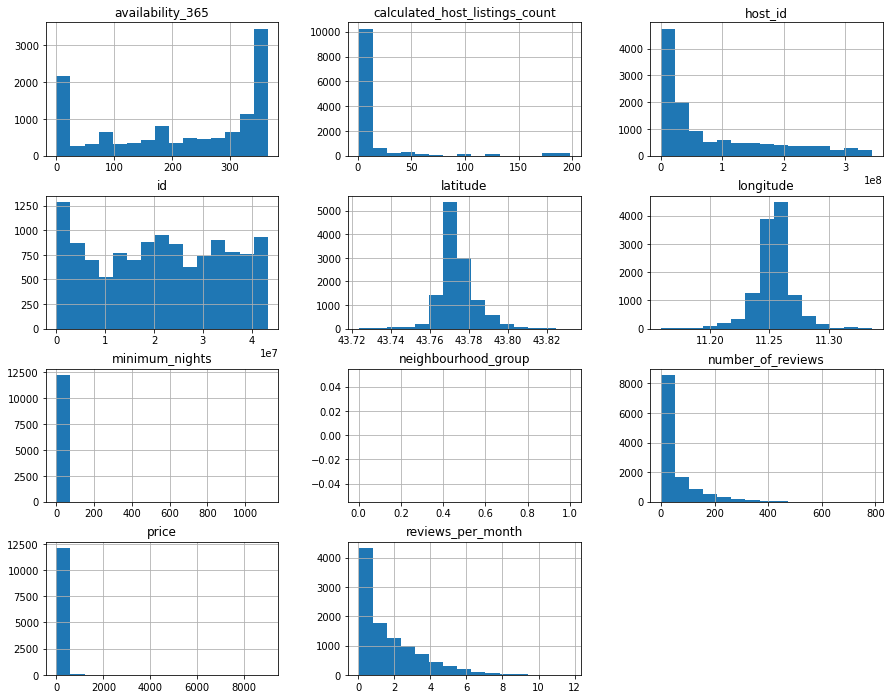

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,12));


### **Q4. Qual a média e mediana dos preços de aluguel?**

Com o valor médio de preços de aluguel, conseguimos ter uma idéia do valor central para Florença. No entanto, considerando-se que possam existir outliers, consideraremos também o valor da mediana.
Com isso, podemos ver indícios de outliers que puxam a média para valores maiores do que a mediana (111 > 80)

In [7]:
# ver a média da coluna `price``
df.price.mean()


111.0082408616188

In [8]:
# ver a mediana da coluna 'price'
df.price.median()

80.0

### **Q5. Verificando se há Outliers** 

Outliers são valores que fogem muito da distribuição dos valores dos atributos do dataset. Muitas vezes, são eles que criam grandes variações entre os valores de média e mediana, por exemplo, e altos valores de dispersão como o desvio padrão (std).

Com isso, a distribuição gráfica fica comprometida e gera menos insights. Podemos ver isso na distribuição de `price` e `minimum_nights`.

Para identificar se há, de fato, outliers utilizaremos 2 maneiras:
* resumo estatístico pelo `describe()`
* Visualização de `boxplots` para as variáveis em questão.

In [17]:
#resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,12256.000000,12256.000000,12256.000000,10223.000000,12256.000000,12256.000000
mean,111.008241,3.127040,52.667265,1.686703,14.674282,213.470382
std,189.593135,18.888332,81.495057,1.712515,36.665446,136.355936
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,55.000000,1.000000,2.000000,0.330000,1.000000,89.000000
50%,80.000000,2.000000,17.000000,1.090000,3.000000,244.500000
75%,119.000000,3.000000,69.000000,2.555000,7.000000,348.000000
max,9000.000000,1120.000000,788.000000,11.750000,198.000000,365.000000


Para as 2 principais variáveis relevantes para nossa detecção de outliers, price e minimum_nights, notamos:

* 75% dos valores para `price` estão abaixo de 119. Enquanto o seu máximo é 9000.
* 75% dos valores para `minimum_nights` estão abaixo de 3, porém o seu máximo é 1120.

Isso reforça o que notamos com nosso rápido teste anterior. Vamos agora visualizar com um **boxplot**.



#### Boxplot para price

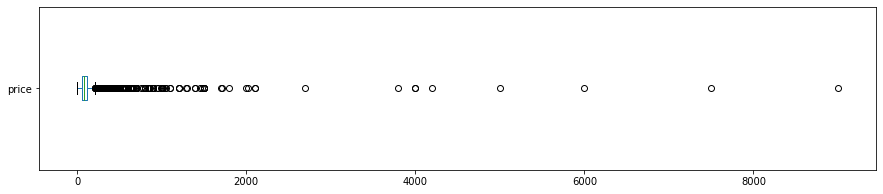

In [18]:
# plot do tipo 'box' para price
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

Como podemos ver, há diversos outliers acima dos nossos valores máximos. 

Com isso, consideraremos Outliers valores acima de 1.5 IQR (Interquartile Range). Cada Quartil é um percentil de 25%. Ou seja, na nossa função de describe anterior, 25% = Q1, 50% = Q2, 75% = Q3.

Outliers estão acima de Q3 + 1.5 IQR

Q3 = 75% = 119
1.5 IQR = 1.5 x (Q3 - Q1) = 1.5 x (119 - 55) = 96
**Q3 + 1.5 IQR = 119 + 96 = 215**

Assim, valores **acima de 215** serão considerados outliers para `price`.

In [26]:
# Calculando a faixa que será considerada Outliers

# Outlier > ((Q3 - Q1) * 1.5) + Q3
outlier_price_iqr = ((df.price.quantile(0.75) - df.price.quantile(0.25)) * 1.5) + df.price.quantile(0.75)
print(outlier_price_iqr)


215.0


In [21]:
# Quantidade de valores acima de 215 para price

print('\nprice: valores acima de 215')
print('{} entradas'.format(len(df[df.price > 215])))
print('{:.2f}%'.format((len(df[df.price > 215]) / df.shape[0])*100))


price: valores acima de 215
862 entradas
7.03%


#### Boxplot para minimum_nights


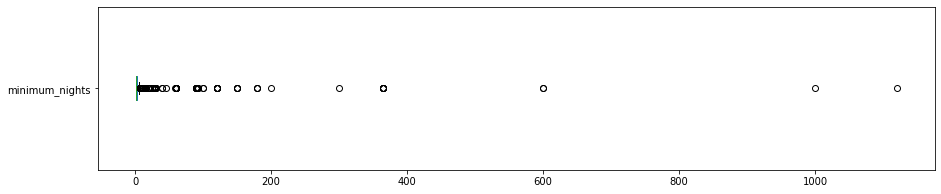

In [27]:
# plot do tipo 'minimum_nights' para price
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

In [28]:
# Calculando a faixa que será considerada Outliers

# Outlier > ((Q3 - Q1) * 1.5) + Q3
outlier_minimum_nights_iqr = ((df.minimum_nights.quantile(0.75) - df.minimum_nights.quantile(0.25)) * 1.5) + df.minimum_nights.quantile(0.75)
print(outlier_minimum_nights_iqr)

6.0


In [30]:
# Quantidade de valores acima de 6 para minimum_nights

print('\nminimum_nights: valores acima de 6')
print('{} entradas'.format(len(df[df.minimum_nights > 6])))
print('{:.2f}%'.format((len(df[df.minimum_nights > 6]) / df.shape[0])*100))


minimum_nights: valores acima de 6
397 entradas
3.24%


#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

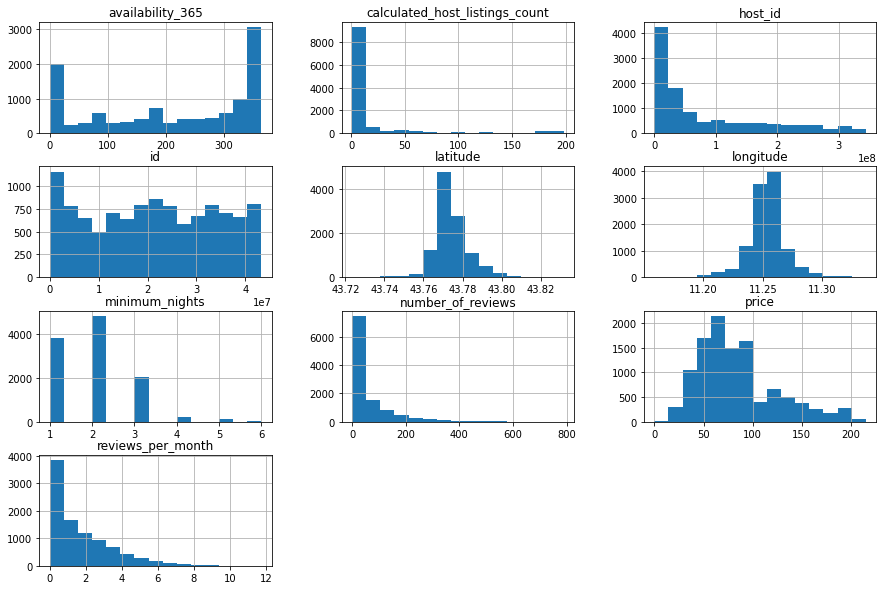

In [31]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 215].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q6. Qual a correlação existente entre as variáveis**

A correlação nos ajuda a entender a relação entre as variáveis do dataset. 
* Quanto maior a relação, mais próximo de 1 será o valor. 
* Quanto menor, mais próximo de 0 será o valor.
* Se positivo, sugere uma correlação em mesma direção.
* Se negativo, sugere uma correlação inversa (quanto maior um, menor o outro).



> **Iremos verificar as correlações a partir de 2 modos:**


* uma matriz de correlação
* um heatmap (mapa de calor)

In [32]:
# criar uma matriz de correlação e filtrar apenas colunas quantitativas relevantes.
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.100390,-0.140033,-0.147308,0.183603,0.156588
minimum_nights,0.100390,1.000000,-0.047218,-0.167140,0.012459,-0.041010
number_of_reviews,-0.140033,-0.047218,1.000000,0.779784,-0.115543,0.101958
reviews_per_month,-0.147308,-0.167140,0.779784,1.000000,-0.146453,0.068937
calculated_host_listings_count,0.183603,0.012459,-0.115543,-0.146453,1.000000,-0.047382
availability_365,0.156588,-0.041010,0.101958,0.068937,-0.047382,1.000000


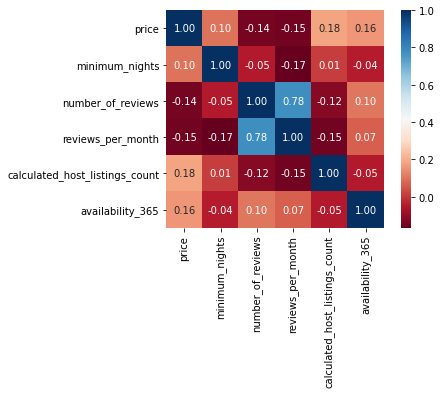

In [33]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


Olhando a tabela acima, nota-se que para a variável preço, por exemplo, não houve nenhuma correlação que fosse fortemente significante para nossa análise. 

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb em Florença?**

Para ver os diferentes tipos de imóveis classificados no nosso dataset, temos a variável `room_type` com as opções de quarto.
Para entender qual tipo é mais alugado, faremos uma contagem por tipo e depois uma proporção em porcentagem.

In [34]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8436
Private room       2311
Hotel room          241
Shared room          46
Name: room_type, dtype: int64

In [35]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.688316
Private room       0.188561
Hotel room         0.019664
Shared room        0.003753
Name: room_type, dtype: float64

Com isso notamos que a grande maioria das ofertas são de casas ou apartamentos inteiros (aproximadamente **76,7%**).

### **Q8. Qual a localidade mais cara do dataset?**
É interessante também identificarmos as regiões mais caras no dataset. Onde seria mais caro de se ficar em Florença?
Para isso, utilizaremos a função `groupby()` com a variável `neighbourhood` para agruparmos por bairros. Com isso, olharemos as médias de preços.


In [39]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)


neighbourhood
Centro Storico       90.120300
Gavinana Galluzzo    77.662531
Isolotto Legnaia     67.534884
Campo di Marte       67.442142
Rifredi              62.403361
Name: price, dtype: float64

In [40]:
#representatividade de quantidade de ofertas em cada bairro
df_clean.neighbourhood.value_counts() / df.shape[0]

Centro Storico       0.653149
Campo di Marte       0.094484
Rifredi              0.077676
Isolotto Legnaia     0.042102
Gavinana Galluzzo    0.032882
Name: neighbourhood, dtype: float64

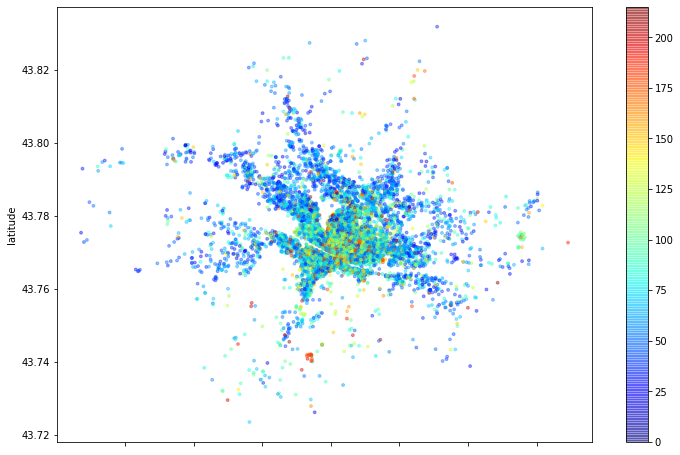

In [43]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Em média, quanto tempo é exigido que se fique hospedado em Florença? Esse é um dado relevante que varia de acordo com o que o dono do local acha interessante para o rendimento da atividade.

In [41]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

1.9319376472720682

## Conclusões


Foi feita uma análise exploratória inicial para se ter uma ideia de que tipo de variáveis estão presentes no dataset. Haviam alguns pontos a serem abordados como outliers que podem gerar diferenças nas análises. Para isso, removemos os outliers através de uma definição comum que é o acima de 1,5 IQR. 

Outro ponto relevante é a maior concentração de ofertas em certos bairros. O Centro Histórico tem a maior parte das ofertas. E por ser um bairro bastante famoso, nossa análise parece estar em linha. 

Esse foi um bom início e para maior aprofundamento, recomenda-se utilizar o dataset completo com todos os 106 atributos também disponível no mesmo site que citei no início desse arquivo.